# Implementation Exercise: Regularization in Practice
## Objective
Learn how to implement regularization techniques, such as L1/L2 regularization and Dropout, in neural networks to prevent overfitting.

## Setup
Begin by importing the necessary libraries and preparing a dataset. For simplicity, we'll continue using a synthetic dataset for a binary classification task.

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=";")

# Preprocess the dataset: Predicting wine quality (binary classification: good or bad)
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 6 else 0)

# Splitting the data into features and target
X = data.drop('quality', axis=1)
y = data['quality'].values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Define the Base Neural Network Model
Create a function to build a simple neural network model without regularization. This will serve as our baseline for comparison.

In [7]:
def build_base_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(20, activation='relu', input_shape=(11,)),
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


## Implement L1/L2 Regularization
Add L1 and/or L2 regularization to the model. Modify the build_base_model function to include L1/L2 regularization in the dense hidden layers. hint: check the kernel_regularizer parameter in the tf.keras.layers.Dense

In [9]:
from tensorflow.keras import regularizers

# TASK: Modify this function to include L1 or L2 regularization
def build_regularized_model(l1=0.01, l2=0.01):
    # Your code here to add L1/L2 regularization
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(20, activation='relu', input_shape=(11,), kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)),
        tf.keras.layers.Dense(20, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model


## Implement Dropout
Incorporate Dropout into the neural network. Modify the build_base_model function to add Dropout layers after each hidden layer. hint: tf.keras.layers.Dropout

In [10]:
# TASK: Modify this function to include Dropout
def build_dropout_model(dropout_rate=0.2):
    # Your code here to add Dropout
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(20, activation='relu', input_shape=(11,)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    return model


## Train and Evaluate Models
Train and evaluate the base model, the regularized model, and the dropout model. Compare their performance.

In [11]:
# Training and evaluation helper function
def train_and_evaluate(model, epochs=500):
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0, validation_split=0.2)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    return history, test_loss, test_accuracy

# Base model
base_model = build_base_model()
base_history, base_loss, base_accuracy = train_and_evaluate(base_model)

# Regularized model
regularized_model = build_regularized_model(l1=0.01, l2=0.01)
reg_history, reg_loss, reg_accuracy = train_and_evaluate(regularized_model)

# Dropout model
dropout_model = build_dropout_model(dropout_rate=0.2)
drop_history, drop_loss, drop_accuracy = train_and_evaluate(dropout_model)


## Visualization and Analysis
Plot the training and validation accuracy of each model to compare their performance.

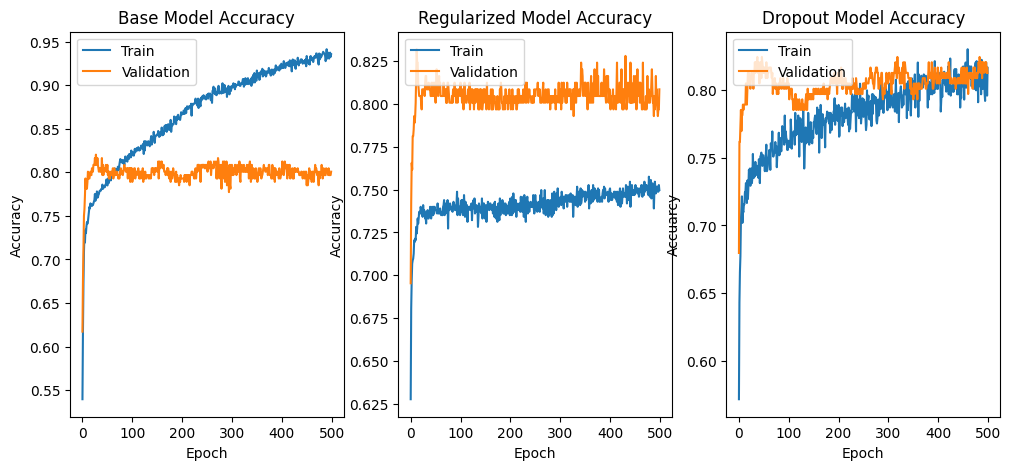

In [14]:
plt.figure(figsize=(12, 5))

# Plot for base model
plt.subplot(1, 3, 1)
plt.plot(base_history.history['accuracy'])
plt.plot(base_history.history['val_accuracy'])
plt.title('Base Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot for regularized model
plt.subplot(1, 3, 2)
plt.plot(reg_history.history['accuracy'])
plt.plot(reg_history.history['val_accuracy'])
plt.title('Regularized Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot for dropout model
plt.subplot(1,3,3)
plt.plot(drop_history.history['accuracy'])
plt.plot(drop_history.history['val_accuracy'])
plt.title("Dropout Model Accuracy")
plt.ylabel("Accuarcy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")


plt.show()

## Tasks and Questions
1. Implement L1/L2 regularization and Dropout in the provided model structures.
- done
2. Implement the visualizations.
- done
3. Observe the effect of each technique on model performance.
- Base model shows to be overfitting. Because train is increasing while validation is not.
- L1/L2 does not seem to overfit. And the model is cautious during training because of higher penalties but does well with the validation data.
- Dropout seems to excel and converge rather quicly. Though Accuracy is not very high compared to L1/L2 and The base model.
4. Discuss which regularization technique seemed most effective and why.
- Dropout. I dont know why.
## Conclusion
Reflect on the importance of regularization techniques in training neural networks and their impact on model performance and generalization